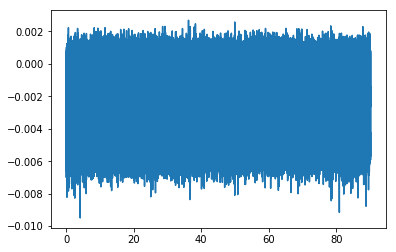

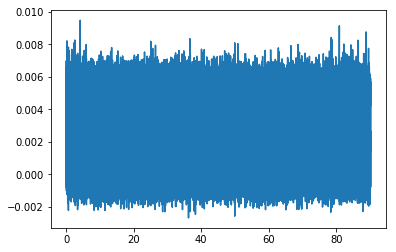

length of updated time list 0
length of updated curr list 0


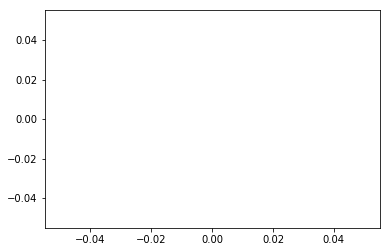

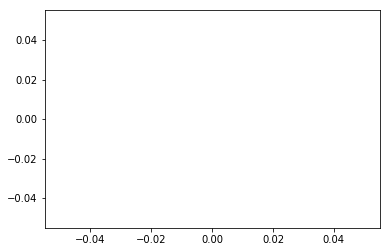

ValueError: zero-size array to reduction operation minimum which has no identity

In [7]:
from nptdms import TdmsFile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal
from scipy import io
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.linalg import solveh_banded
import matplotlib.mlab as mlab
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import expon




###############################################################################################
###############################################################################################
###############################################################################################
###############################################################################################
num_to_plot=57
for i in range(56,num_to_plot):
    
    curr_val_dict = io.loadmat('RAW_MINUS_AsLS_treated_signal_(ATC)5_dNTP (%s).mat'%i)

    time_curr_val = curr_val_dict['array']



    time_val = time_curr_val[:,0]
    curr_val = time_curr_val[:,1]

    #Plot the actual data point
    plt.plot(time_val,curr_val)
    plt.savefig('RAW_MINUS_AsLS_treated_signal_(ATC)5_dNTP (%s).png'%i)
    plt.show() 
    plt.close()

    ###############################################################################################
    ###############################################################################################
    ###############################################################################################
    ###############################################################################################

    #Inverting current arrays

    inv_curr_val = curr_val * -1.0

    #plot the inverted data points
    plt.plot(time_val,inv_curr_val)
    plt.savefig('RAW_MINUS_AsLS_treated_signal_inverted_(ATC)5_dNTP (%s).png'%i)
    plt.show() 
    plt.close()


    ###############################################################################################
    ###############################################################################################
    ###############################################################################################
    ###############################################################################################

    #Empty list to store time and curr values > 10pA 

    updated_time_val = []
    updated_curr_val = []

    for j in range(inv_curr_val.shape[0]):
        if inv_curr_val[j] > 0.01:
            updated_curr_val.append(inv_curr_val[j])
            updated_time_val.append(time_val[j])



    print("length of updated time list", len(updated_time_val))
    print("length of updated curr list", len(updated_curr_val))


    updated_time_val = np.asarray(updated_time_val)
    updated_curr_val = np.asarray(updated_curr_val)


    plt.plot(updated_time_val,updated_curr_val)
    plt.savefig('RAW_MINUS_AsLS_treated_signal_masked_(ATC)5_dNTP (%s).png'%i)
    plt.show() 
    plt.close()
    
    
    np.seterr(divide='ignore', invalid='ignore')
    ###############################################################################################
    ###############################################################################################
    ###############################################################################################
    ###############################################################################################
    #histogram
    plt.hist(updated_curr_val, 30, edgecolor='black', linewidth=2,facecolor='blue', density = True)
    plt.savefig('TN_histogram_(ATC)5_dNTP (%s).png'%i)
    plt.show() 
    plt.close()


    (mu, sigma) = expon.fit(updated_curr_val)

    # the histogram of the data
    n, bins, patches = plt.hist(updated_curr_val, 30, density=1, edgecolor='black', linewidth=2, facecolor='green', alpha=0.75)

    # add a 'best fit' line
    y = expon.pdf( bins, mu, sigma)
    l = plt.plot(bins, y, 'r--', linewidth=2)
    #plot
    plt.xlabel('Current')
    plt.ylabel('Count')
    plt.title(r'$\mathrm{Histogram\ of\ currents:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
    plt.grid(True)
    plt.savefig('TN_exponential_(ATC)5_dNTP (%s).png'%i)
    plt.show() 
    plt.close()
